## 目录
1. 提取数据并构建初始数据帧（DataFrame）
2. 对数据进行分类
3. 将所有温度和湿度数据帧合并（merge）为一
4. 数据类别及趋势的可视化
5. 采用「pythermalcomfort」工具包运算 「pmv & ppd」指数及可视化
6. 在房间02-412最初给人「暖/热」感觉的时隙中，采用新的衣服热阻（'clo' ）值
7. 结论及进一步建议

## 针对的问题：
Q1. 两个房间的室内温度及湿度有什么趋势？与室外环境相比，可以怎样评价室内空调系统？

Q2. 两个房间的温度及湿度数据特点是什么？

Q3. 根据ASHRAE（美国采暖制冷空调工程师协会）的热舒适规范标准，温度及湿度数据分类的分布是什么？

Q4. 房间12-431的温度及湿度数据之间是否存在任何关系？

Q5. 「pmv & ppd」指数类别的分布是什么？与温度及湿度数据类别的分布相比，可以得出什么见解？

Q6. 与两个房间的温度及湿度相比，「pmv & ppd」指数有什么趋势？

Q7. 房间02-412的温度数据及pmv指数之间是否存在任何关系？

Q8. 针对房间02-412中，最初会产生「温暖/热」感觉的500个时段，如果使用者只是选择脱下冬季衣服，即将clo值改为0.61 clo（相当于「裤子和长袖衬衫」），他们的感觉会改善吗？如有，改善的时间段的比例会是多少？

## 1. 提取数据并构建初始数据帧 (DataFrame)

首先，使用适当的数据类型，从数据集中为每个房间分别构建温度和湿度数据帧，并将数值取整至小数点后2位。

In [1]:
# 导入必要的工具包以进行数据操作和可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

In [2]:
# 为房间02-412的温度数据建立数据帧
Temp_Cel_02_412 = pd.read_csv('ES_B_02_412_3E68_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_02_412['Date & Time'] = pd.to_datetime(Temp_Cel_02_412['Date & Time'])
Temp_Cel_02_412['Temperature (°C)'] = round(Temp_Cel_02_412['Temperature (°C)'].astype('float64'),2)

# 为房间02-412的湿度数据建立数据帧
Huma_02_412 = pd.read_csv('ES_B_02_412_3E68_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_02_412['Date & Time'] = pd.to_datetime(Huma_02_412['Date & Time'])
Huma_02_412['Humidity (%)'] = round(Huma_02_412['Humidity (%)'].astype('float64'),2)

# 为房间12-431的温度数据建立数据帧
Temp_Cel_12_431 = pd.read_csv('ES_B_12_431_7BC2_temp.txt', names = ('Date & Time', 'Temperature (°C)'), engine = 'python')
Temp_Cel_12_431['Date & Time'] = pd.to_datetime(Temp_Cel_12_431['Date & Time'])
Temp_Cel_12_431['Temperature (°C)'] = round(Temp_Cel_12_431['Temperature (°C)'].astype('float64'),2)

# 为房间12-431的湿度数据建立数据帧
Huma_12_431 = pd.read_csv('ES_B_12_431_7BC2_huma.txt', names = ('Date & Time', 'Humidity (%)'), engine = 'python')
Huma_12_431['Date & Time'] = pd.to_datetime(Huma_12_431['Date & Time'])
Huma_12_431['Humidity (%)'] = round(Huma_12_431['Humidity (%)'].astype('float64'),2)

# 检查数据帧
display(Temp_Cel_02_412.sample(5), Huma_02_412.tail(), Temp_Cel_12_431.head(), Huma_12_431.tail())

,Date & Time,Temperature (°C)
16745,2021-07-23 20:28:23,18.26
16956,2021-07-24 21:41:24,19.87
2210,2021-05-11 23:52:11,19.97
12650,2021-07-03 07:22:27,21.58
16868,2021-07-24 11:19:20,18.06


,Date & Time,Humidity (%)
18169,2021-07-30 23:26:57,35.10
18170,2021-07-30 23:34:01,34.74
18171,2021-07-30 23:41:05,33.73
18172,2021-07-30 23:48:09,33.00
18173,2021-07-30 23:55:13,32.71


,Date & Time,Temperature (°C)
0,2021-05-01 00:05:11,21.58
1,2021-05-01 00:12:14,21.16
2,2021-05-01 00:19:19,22.39
3,2021-05-01 00:26:22,22.16
4,2021-05-01 00:33:26,21.87


,Date & Time,Humidity (%)
18200,2021-07-30 23:25:03,29.47
18201,2021-07-30 23:32:07,29.34
18202,2021-07-30 23:39:11,28.77
18203,2021-07-30 23:46:15,28.44
18204,2021-07-30 23:53:18,27.78


In [3]:
# 检查数据列的数据类型和数据帧形状
print(Temp_Cel_02_412.dtypes, '\n', Huma_02_412.shape, '\n', Temp_Cel_12_431.shape)

Date & Time         datetime64[ns]
Temperature (°C)           float64
dtype: object 
 (18174, 2) 
 (18205, 2)


In [4]:
# 以「日期和时间」（Date & Time）列为主键，合并每个房间的温度和湿度数据帧
Temp_Cel_Huma_02_412 = pd.merge(Temp_Cel_02_412, Huma_02_412, on = 'Date & Time', how='inner')
Temp_Cel_Huma_12_431 = pd.merge(Temp_Cel_12_431, Huma_12_431, on = 'Date & Time', how='inner')

print(Temp_Cel_Huma_02_412.sample(5), '\n', Temp_Cel_Huma_12_431.sample(5))

              Date & Time  Temperature (°C)  Humidity (%)
16822 2021-07-24 05:54:01             17.42         43.98
7555  2021-06-07 18:35:19             20.61         43.70
9200  2021-06-16 01:10:30             22.00         53.09
7733  2021-06-08 16:02:00             21.65         40.70
2176  2021-05-11 19:51:52             20.97         54.27 
               Date & Time  Temperature (°C)  Humidity (%)
3157  2021-05-16 21:17:43             20.00         22.89
1442  2021-05-08 06:18:26             21.39         55.98
17089 2021-07-25 10:36:36             19.58         21.94
6700  2021-06-03 13:26:27             21.26         44.19
16242 2021-07-21 05:16:11             18.87         27.94


## 2. 对数据进行分类

根据ASHRAE（美国采暖制冷空调工程师协会）有关热舒适规范标准，将数据分类到新列中，即在冬季的室内环境中，「舒适」范围为：

- 温度：68°F - 74°F（~20°C - 23.5°C）及

- 相对湿度：30% - 60%

https://www7.nau.edu/itep/main/eeop/docs/airqlty/AkIAQ_ThermalComfort.pdf

In [5]:
# 设置温度和湿度类别的界线
temp_acce_lower_lim=20.00
temp_acce_upper_lim=23.50
huma_acce_lower_lim=30.00
huma_acce_upper_lim=60.00

bins_Temp_Winter = [0, temp_acce_lower_lim, temp_acce_upper_lim, np.inf]
bins_Huma = [0, huma_acce_lower_lim, huma_acce_upper_lim, np.inf]
Temp_categories_indoor = ['Low Temp', 'Acceptable Temp','High Temp']
Huma_categories_indoor = ['Dry', 'Acceptable Huma','Wet']

# 将数据分类到新列中
Temp_Cel_Huma_02_412['Temp_cats'] = pd.cut(Temp_Cel_Huma_02_412['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_02_412['Huma_cats'] = pd.cut(Temp_Cel_Huma_02_412['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

Temp_Cel_Huma_12_431['Temp_cats'] = pd.cut(Temp_Cel_Huma_12_431['Temperature (°C)'], bins_Temp_Winter, labels = Temp_categories_indoor)
Temp_Cel_Huma_12_431['Huma_cats'] = pd.cut(Temp_Cel_Huma_12_431['Humidity (%)'], bins_Huma, labels = Huma_categories_indoor)

# 显示每个类别数的数量，并检查数据类型
print(f"02_412_Temp_cats: \n{Temp_Cel_Huma_02_412['Temp_cats'].value_counts()}\n\n02_412_Huma_cats: \n{Temp_Cel_Huma_02_412['Huma_cats'].value_counts()}\n\n12_431_Temp_cats: \n{Temp_Cel_Huma_12_431['Temp_cats'].value_counts()}\n\n12_431_Huma_cats: \n{Temp_Cel_Huma_12_431['Huma_cats'].value_counts()}\n\nData types: \n{Temp_Cel_Huma_02_412.dtypes}")

02_412_Temp_cats: 
Low Temp           8430
Acceptable Temp    8317
High Temp          1427
Name: Temp_cats, dtype: int64

02_412_Huma_cats: 
Acceptable Huma    16420
Wet                  877
Dry                  877
Name: Huma_cats, dtype: int64

12_431_Temp_cats: 
Acceptable Temp    12527
Low Temp            5676
High Temp              2
Name: Temp_cats, dtype: int64

12_431_Huma_cats: 
Acceptable Huma    13653
Dry                 4490
Wet                   62
Name: Huma_cats, dtype: int64

Data types: 
Date & Time         datetime64[ns]
Temperature (°C)           float64
Humidity (%)               float64
Temp_cats                 category
Huma_cats                 category
dtype: object


In [6]:
# 再次检查每个房间的数据帧形状
print(Temp_Cel_Huma_02_412.shape, '\n', Temp_Cel_Huma_12_431.shape)

(18174, 5) 
 (18205, 5)


## 3. 将所有温度和湿度数据帧合并（merge）为一

### 3.1 在合并之前，比较数据帧中的「时间差」（Time_Diff）

可见，由于两个数据帧在同一时期内的记录行数不同（可能是由于每个传感器的维护/校准的时间差异），因此，它们都不能被粗略地选择为合并函数中的「左表」。

为了将两者合并为更均匀的数据帧，所有记录之间的「时间差」值将被计算为新列，「时间差」列中具有较小标准差（Standard Deviation, STD）的数据帧将是一个更均匀的数据框（所有数据分布更接近平均值）。

In [7]:
# 分别计算两个数据帧的记录之间的时间差
Temp_Cel_Huma_02_412['Time_Diff'] = Temp_Cel_Huma_02_412['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))
Temp_Cel_Huma_12_431['Time_Diff'] = Temp_Cel_Huma_12_431['Date & Time'].diff().fillna(pd.Timedelta(seconds=0))

display(Temp_Cel_Huma_02_412.tail(), Temp_Cel_Huma_12_431.head())

,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
18169,2021-07-30 23:26:57,19.68,35.10,Low Temp,Acceptable Huma,0 days 00:07:04
18170,2021-07-30 23:34:01,22.52,34.74,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18171,2021-07-30 23:41:05,18.39,33.73,Low Temp,Acceptable Huma,0 days 00:07:04
18172,2021-07-30 23:48:09,21.06,33.00,Acceptable Temp,Acceptable Huma,0 days 00:07:04
18173,2021-07-30 23:55:13,18.10,32.71,Low Temp,Acceptable Huma,0 days 00:07:04


,Date & Time,Temperature (°C),Humidity (%),Temp_cats,Huma_cats,Time_Diff
0,2021-05-01 00:05:11,21.58,54.02,Acceptable Temp,Acceptable Huma,0 days 00:00:00
1,2021-05-01 00:12:14,21.16,54.18,Acceptable Temp,Acceptable Huma,0 days 00:07:03
2,2021-05-01 00:19:19,22.39,54.23,Acceptable Temp,Acceptable Huma,0 days 00:07:05
3,2021-05-01 00:26:22,22.16,54.27,Acceptable Temp,Acceptable Huma,0 days 00:07:03
4,2021-05-01 00:33:26,21.87,54.25,Acceptable Temp,Acceptable Huma,0 days 00:07:04


In [8]:
# 检查两个 'Time_Diff' 列的描述性统计（Descriptive Statistics）
print(Temp_Cel_Huma_02_412['Time_Diff'].describe(), '\n\n', Temp_Cel_Huma_12_431['Time_Diff'].describe())

count                        18174
mean     0 days 00:07:12.598987564
std      0 days 00:01:00.928074890
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:17
Name: Time_Diff, dtype: object 

 count                        18205
mean     0 days 00:07:11.842186212
std      0 days 00:00:57.698448356
min                0 days 00:00:00
25%                0 days 00:07:04
50%                0 days 00:07:04
75%                0 days 00:07:04
max                0 days 00:21:19
Name: Time_Diff, dtype: object


### 3.2 为「merge_asof」函数选定「左表」

房间12-431 的标准差更小（约57.70秒）。

因此，选择房间12-431 的数据帧作为「merge_asof」函数中的「左表」。

In [9]:
# 删除 'Time_Diff' 列，因为对未来的计算不相关
Temp_Cel_Huma_02_412 = Temp_Cel_Huma_02_412.drop('Time_Diff', axis = 1)
Temp_Cel_Huma_12_431 = Temp_Cel_Huma_12_431.drop('Time_Diff', axis = 1)

In [10]:
# 在两个数据帧上应用 merge_asof 函数，并使用房间12-431 作为「左表」，然后重新排序列
all_Temp_Huma = pd.merge_asof(Temp_Cel_Huma_12_431, Temp_Cel_Huma_02_412, on = ['Date & Time'], direction = 'nearest', suffixes=['_12_431', '_02_412'])

# 重新排序列
re_ordered_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 
                   'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431']

all_Temp_Huma = all_Temp_Huma[re_ordered_cols]

print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431
4055,2021-05-21 08:23:52,21.52,40.06,Acceptable Temp,Acceptable Huma,19.71,33.94,Low Temp,Acceptable Huma
10774,2021-06-23 21:17:24,20.52,44.95,Acceptable Temp,Acceptable Huma,20.16,38.40,Acceptable Temp,Acceptable Huma
12386,2021-07-01 22:32:40,19.03,57.70,Low Temp,Acceptable Huma,20.74,50.69,Acceptable Temp,Acceptable Huma
16629,2021-07-23 03:27:29,17.29,41.35,Low Temp,Acceptable Huma,18.00,34.11,Low Temp,Acceptable Huma
10829,2021-06-24 04:00:20,18.65,48.07,Low Temp,Acceptable Huma,19.65,40.10,Low Temp,Acceptable Huma


## 4. 数据类别及趋势的可视化

在不同图表中沿着相同的「日期和时间」列，绘制

- 温度和湿度数据的趋势，以及，

- ASHRAE规范标准建议的「舒适」温度及湿度范围界线

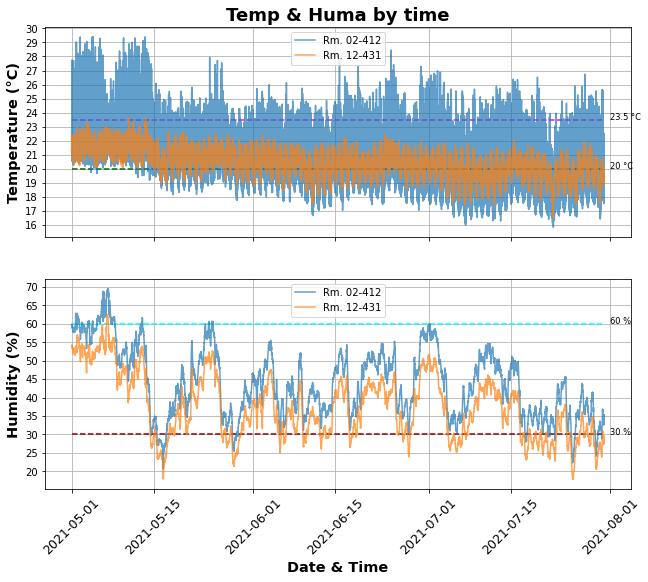

In [11]:
# 两个房间的「日期和时间」相对温度和湿度数据的可视化
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)
colour = 'white' ## ！！！使用「夜间模式」/「深色主题」时替换两种颜色
colour_2 = 'black'

# 编辑两个图表的外观
ax1.set_title('Temp & Huma by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('Temperature (°C)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('Humidity (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)
plt.xticks(rotation = 45, fontsize=12.5)

# 绘制图表
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Temperature (°C)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=temp_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkgreen', linestyles='dashed')
ax1.hlines(y=temp_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
ax1.text('2021-08-01', temp_acce_lower_lim,'20 °C', fontsize='small')
ax1.text('2021-08-01', temp_acce_upper_lim,'23.5 °C', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['Humidity (%)_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=huma_acce_lower_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')
ax2.hlines(y=huma_acce_upper_lim, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='cyan', linestyles='dashed')
ax2.text('2021-08-01', huma_acce_lower_lim,'30 %', fontsize='small')
ax2.text('2021-08-01', huma_acce_upper_lim,'60 %', fontsize='small')

plt.show()

### 由于高密度及波动，温度图可能不像一般的线形图，让我们放大及使用前150个温度数据并绘制样本图，我们可以看到它实际上是一个普通线形图

<AxesSubplot:xlabel='Date & Time'>

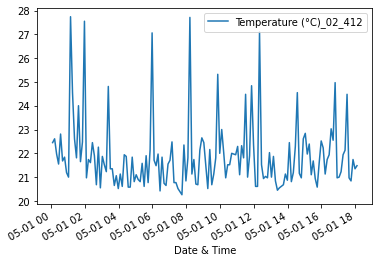

In [12]:
all_Temp_Huma.iloc[0:150].plot('Date & Time', 'Temperature (°C)_02_412')

### Q1. 两个房间的室内温度及湿度有什么趋势？与室外环境相比，可以怎样评价室内空调系统？

- 房间12.431 的温度数据的波动性低于房间02.412，然而，两个数据集的温度都显著下降到低于 20 °C。


- 两个房间的湿度数据以约为 8% 的差异遵循相似的趋势，看似很大部分落入 30%-60%（可接受的湿度范围）。

这表明两个房间的空调系统不能充分调节室内热舒适度到「令人满意」的程度，因为在2021 年 5 月上半月中，室外温度明显低于房间02-412 的室内温度，相反从 2021 年 5 月 15 日起直到 2021 年 7 月底，两个房间的温度逐渐降至 20°C 以下，对于从事数据/分析工作的人员来说，可能这两个房间都不能成为理想的处所/工作环境。

天气的历史数据来源：

https://www.timeanddate.com/weather/australia/sydney/historic?month=5&year=2021

https://www.timeanddate.com/weather/australia/sydney/historic?month=7&year=2021

       Temperature (°C)_02_412  Temperature (°C)_12_431
count             18205.000000             18205.000000
mean                 20.429939                20.441938
std                   2.056292                 0.949141
min                  15.840000                16.480000
25%                  18.900000                19.840000
50%                  20.290000                20.480000
75%                  21.710000                21.100000
max                  29.420000                23.650000
       Humidity (%)_02_412  Humidity (%)_12_431
count         18205.000000         18205.000000
mean             43.878452            37.377987
std               9.445582             8.776173
min              20.720000            17.810000
25%              36.000000            30.070000
50%              43.170000            36.390000
75%              50.760000            43.620000
max              69.580000            62.420000


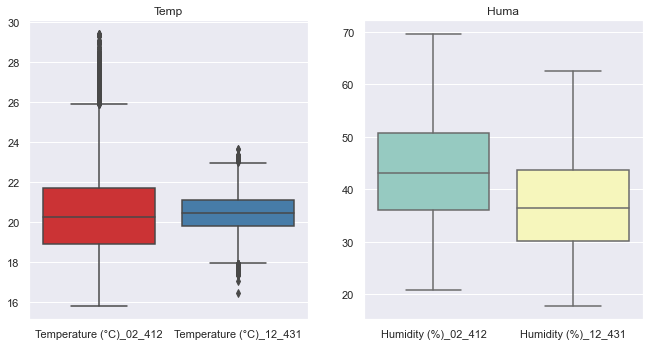

In [13]:
# 以箱线图把两个房间的温度和湿度数据的描述性统计进行可视化
sns.set(rc={'figure.figsize':(11,5.5)})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1 = sns.boxplot(data=all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']], palette='Set1', ax=ax1)
ax2 = sns.boxplot(data=all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']], palette='Set3', ax=ax2)

ax1.set_title('Temp')
ax2.set_title('Huma')

print(all_Temp_Huma[['Temperature (°C)_02_412', 'Temperature (°C)_12_431']].describe())
print(all_Temp_Huma[['Humidity (%)_02_412', 'Humidity (%)_12_431']].describe())

plt.show()

### Q2. 两个房间的温度及湿度数据特点是什么？

如描述性统计及箱形图所示：

- 在空调不充足的环境下，由于房间02-412 的温度数据有高波动性和大的标准偏差，导致有更多比平均温度高约 5.5°C - 9°C 的上离群值（upper outliers）。


- 两个房间的相对湿度遵循相似的趋势，并具有恒定的差异（也显示在早前的图表中），两者标准差（std）的差异仅为 ~ 7.6 %。

Low Temp           0.464158
Acceptable Temp    0.456743
High Temp          0.079099
Name: Temp_cats_02_412, dtype: float64 

 Acceptable Temp    0.688108
Low Temp           0.311782
High Temp          0.000110
Name: Temp_cats_12_431, dtype: float64 

 Acceptable Huma    0.904532
Wet                0.047734
Dry                0.047734
Name: Huma_cats_02_412, dtype: float64 

 Acceptable Huma    0.749959
Dry                0.246636
Wet                0.003406
Name: Huma_cats_12_431, dtype: float64


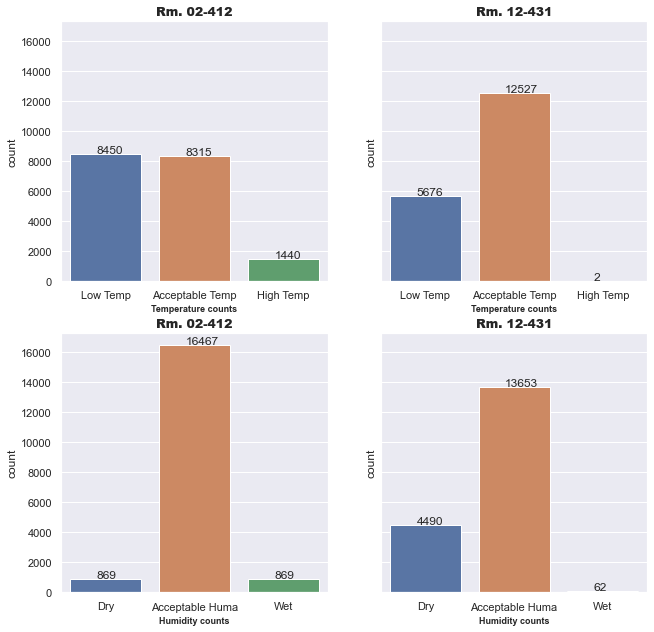

In [14]:
# 显示所有温度和湿度分类的数目分布
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# 绘制图表
ax1 = sns.countplot(x='Temp_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='Temp_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='Huma_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='Huma_cats_12_431', data=all_Temp_Huma, ax=ax4)

# 编辑图表的外观
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('Temperature counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('Humidity counts', fontsize=9, fontweight ='bold')

# 在柱状图上加注释
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

print(all_Temp_Huma['Temp_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Temp_cats_12_431'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_02_412'].value_counts(normalize=True), '\n\n', 
      all_Temp_Huma['Huma_cats_12_431'].value_counts(normalize=True))

plt.show()

### Q3. 根据ASHRAE（美国采暖制冷空调工程师协会）的热舒适规范标准，温度及湿度数据分类的分布是什么？

如类别柱状计数图所示，除了显著的「低温」类别数目，房间02-412 亦有 1440 个 「高温」（约8％）及 869 条「潮湿」（4.77％）类的记录（对应早前趋势图表的 2021 年 5 月 上半月部分）。而房间12-431 的同类记录的数目则可忽视。

r^2 = 0.145


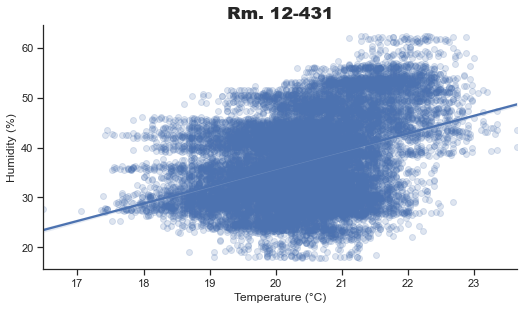

In [15]:
# 为房间12.431 的湿度与温度绘制散点图（scatterplot）及回归线（regression line）
from sklearn.linear_model import LinearRegression 
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=Temp_Cel_Huma_12_431['Temperature (°C)']
y=Temp_Cel_Huma_12_431['Humidity (%)']

# 绘制图表
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 12-431', fontsize=17.5, fontweight ='heavy')

# 计算 r^2 值
lin_reg = LinearRegression().fit(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])
r2 = lin_reg.score(Temp_Cel_Huma_12_431[['Temperature (°C)']], Temp_Cel_Huma_12_431['Humidity (%)'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### Q4. 房间12-431的温度及湿度数据之间是否存在任何关系？

r^2 值（拟合优度/决定系数）小于 0.4，表示温度及湿度之间的相关性较弱。

（根据 https://www.investopedia.com/terms/r/r-squared.asp ，r^2 大于 0.7 为强相关性）

## 5. 采用「pythermalcomfort」工具包运算「pmv & ppd」指数及可视化

采用第三方python工具包 - 「pythermalcomfort」计算「pmv & ppd」指数，并在现有数据帧「all_Temp_Huma」中创建新列。

一个时隙必须满足以下条件，方可被定义为「舒适」的室内环境：

 - -0.5 <= pmv <=0.5
 - ppd <= 10%
 
https://www.simscale.com/blog/2019/09/what-is-pmv-ppd/

### 如欲深入了解有关「热舒适」的理论及「pythermalcomfort」工具包的资料，请参阅「（简中）README.md」。

In [40]:
'''
!!!不要再次运行此单元格。
'''
# # import sys to install pythermalcomfort
# import sys
# !{sys.executable} -m pip install pythermalcomfort

  Using cached pythermalcomfort-1.10.0-py2.py3-none-any.whl (42 kB)
  Using cached jos3-0.2.6-py3-none-any.whl (27 kB)


In [16]:
# 导入 pythermalcomfort 工具包并检查其内容
import pythermalcomfort
help(pythermalcomfort)

Help on package pythermalcomfort:

NAME
    pythermalcomfort

PACKAGE CONTENTS
    __main__
    cli
    models
    optimized_functions
    psychrometrics
    utilities

VERSION
    __version__ = '1.10.0'

FILE
    c:\anaconda3\lib\site-packages\pythermalcomfort\__init__.py




In [18]:
# 使用第一行数据测试「pythermalcomfort」工具包 - temp(温度) = 22.45 °C 和 huma(湿度) = 59.56 % (2021-05-01 00:05:11)
from pythermalcomfort.models import pmv_ppd

warnings.filterwarnings('ignore')  # 运行此单元两次以忽视警告

# 根据假设定义变量 - 运行温度，相对湿度，风速，新陈代谢率，服装热阻
date = all_Temp_Huma['Date & Time'].iloc[0]
test_op_temp = all_Temp_Huma['Temperature (°C)_02_412'].iloc[0]
air_spd_r = 0.1 # 模拟简单的传热计算
test_rh = all_Temp_Huma['Humidity (%)_02_412'].iloc[0]
met = 1.1 # 打字，两个房间的使用者的典型工作
clo = 1 # 典型的冬季室内服装
wme = 0
standard = 'ASHRAE'

# 假设平均辐射温度（如室内物件温度） = 空气温度，因此 tdb = tr
test_results = pmv_ppd(tdb=test_op_temp, tr=test_op_temp, vr=air_spd_r, rh=test_rh, met=met, clo=clo, wme=wme, standard=standard)

# print(test_results['pmv'])
print(f"Date & Time: {date}, pmv: {test_results['pmv']}, ppd: {test_results['ppd']}.")

Date & Time: 2021-05-01 00:05:11, pmv: 0.07, ppd: 5.1.


In [19]:
# 计算所有 pmv & ppd 指数并创建新列
all_Temp_Huma['pmv & ppd_02_412'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], x['Temperature (°C)_02_412'], air_spd_r, 
                                                        x['Humidity (%)_02_412'], met, clo, wme, standard), axis=1)

all_Temp_Huma['pmv & ppd_12_431'] = all_Temp_Huma.apply(lambda x: pmv_ppd(x['Temperature (°C)_12_431'], x['Temperature (°C)_12_431'], air_spd_r, 
                                                        x['Humidity (%)_12_431'], met, clo, wme, standard), axis=1)

warnings.filterwarnings(action='ignore')

all_Temp_Huma

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv & ppd_02_412,pmv & ppd_12_431
0,2021-05-01 00:05:11,22.45,59.56,Acceptable Temp,Acceptable Huma,21.58,54.02,Acceptable Temp,Acceptable Huma,"{'pmv': 0.07, 'ppd': 5.1}","{'pmv': -0.18, 'ppd': 5.6}"
1,2021-05-01 00:12:14,22.61,59.52,Acceptable Temp,Acceptable Huma,21.16,54.18,Acceptable Temp,Acceptable Huma,"{'pmv': 0.11, 'ppd': 5.3}","{'pmv': -0.28, 'ppd': 6.6}"
2,2021-05-01 00:19:19,21.97,59.66,Acceptable Temp,Acceptable Huma,22.39,54.23,Acceptable Temp,Acceptable Huma,"{'pmv': -0.05, 'ppd': 5.0}","{'pmv': 0.02, 'ppd': 5.0}"
3,2021-05-01 00:26:22,21.55,59.94,Acceptable Temp,Acceptable Huma,22.16,54.27,Acceptable Temp,Acceptable Huma,"{'pmv': -0.15, 'ppd': 5.4}","{'pmv': -0.03, 'ppd': 5.0}"
4,2021-05-01 00:33:26,22.81,59.78,Acceptable Temp,Acceptable Huma,21.87,54.25,Acceptable Temp,Acceptable Huma,"{'pmv': 0.16, 'ppd': 5.5}","{'pmv': -0.11, 'ppd': 5.2}"
...,...,...,...,...,...,...,...,...,...,...,...
18200,2021-07-30 23:25:03,19.68,35.10,Low Temp,Acceptable Huma,19.00,29.47,Low Temp,Dry,"{'pmv': -0.74, 'ppd': 16.4}","{'pmv': -0.92, 'ppd': 23.0}"
18201,2021-07-30 23:32:07,22.52,34.74,Acceptable Temp,Acceptable Huma,19.32,29.34,Low Temp,Dry,"{'pmv': -0.08, 'ppd': 5.1}","{'pmv': -0.85, 'ppd': 20.3}"
18202,2021-07-30 23:39:11,18.39,33.73,Low Temp,Acceptable Huma,19.26,28.77,Low Temp,Dry,"{'pmv': -1.04, 'ppd': 27.9}","{'pmv': -0.87, 'ppd': 20.9}"
18203,2021-07-30 23:46:15,21.06,33.00,Acceptable Temp,Acceptable Huma,19.45,28.44,Low Temp,Dry,"{'pmv': -0.43, 'ppd': 8.8}","{'pmv': -0.83, 'ppd': 19.4}"


In [20]:
# 将旧的「pmv & ppd」列拆分为单独的「pmv」和「ppd」新列、然后删除，再根据房间号对所有列重新排序
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_02_412'], axis=1), all_Temp_Huma['pmv & ppd_02_412'].apply(pd.Series)], axis=1)
all_Temp_Huma = pd.concat([all_Temp_Huma.drop(['pmv & ppd_12_431'], axis=1), all_Temp_Huma['pmv & ppd_12_431'].apply(pd.Series)], axis=1)

new_cols = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'Temperature (°C)_12_431', 
            'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_02_412', 'ppd_02_412', 'pmv_12_431', 'ppd_12_431']

# 重新命名列
all_Temp_Huma.columns = new_cols

# 重新排序列
new_cols_ordered = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 
                    'Temperature (°C)_12_431', 'Humidity (%)_12_431', 'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431']

all_Temp_Huma = all_Temp_Huma[new_cols_ordered]

In [21]:
# 检查数据帧在「pmv」和「ppd」列分开时的形状和外观
print(all_Temp_Huma.shape)
all_Temp_Huma.sample(5)

(18205, 13)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,Temperature (°C)_12_431,Humidity (%)_12_431,Temp_cats_12_431,Huma_cats_12_431,pmv_12_431,ppd_12_431
16634,2021-07-23 04:02:48,21.19,41.47,Acceptable Temp,Acceptable Huma,-0.35,7.5,18.61,34.86,Low Temp,Acceptable Huma,-0.98,25.5
1367,2021-05-07 21:28:24,23.48,60.60,Acceptable Temp,Wet,0.33,7.3,21.23,55.01,Acceptable Temp,Acceptable Huma,-0.26,6.4
5579,2021-05-28 22:53:19,21.42,28.60,Acceptable Temp,Dry,-0.37,7.9,20.84,24.19,Acceptable Temp,Dry,-0.53,10.9
11426,2021-06-27 03:17:51,18.06,39.33,Low Temp,Acceptable Huma,-1.09,30.0,20.48,32.85,Acceptable Temp,Acceptable Huma,-0.56,11.7
4102,2021-05-21 14:17:18,20.16,53.95,Acceptable Temp,Acceptable Huma,-0.52,10.6,20.52,47.07,Acceptable Temp,Acceptable Huma,-0.47,9.7


In [22]:
# 同样，对「pmv」和「ppd」指数进行分类，检查列的数据类型和每个类别的数目比例
pmv_low=-0.5
pmv_neu=0.5
ppd_sat=10

all_Temp_Huma['pmv_cats_02_412'] = np.where(all_Temp_Huma['pmv_02_412']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_02_412']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_02_412'] = pd.Series(all_Temp_Huma['pmv_cats_02_412'], dtype='category')

all_Temp_Huma['ppd_cats_02_412'] = np.where(all_Temp_Huma['ppd_02_412']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_02_412'] = pd.Series(all_Temp_Huma['ppd_cats_02_412'], dtype='category')

all_Temp_Huma['pmv_cats_12_431'] = np.where(all_Temp_Huma['pmv_12_431']<pmv_low,'Cool/Cold', np.where(all_Temp_Huma['pmv_12_431']<=pmv_neu, 'Neutral', 'Warm/Hot'))
all_Temp_Huma['pmv_cats_12_431'] = pd.Series(all_Temp_Huma['pmv_cats_12_431'], dtype='category')

all_Temp_Huma['ppd_cats_12_431'] = np.where(all_Temp_Huma['ppd_12_431']<=ppd_sat,'Satisfied', 'Dissatisfied')
all_Temp_Huma['ppd_cats_12_431'] = pd.Series(all_Temp_Huma['ppd_cats_12_431'], dtype='category')

# 重新排序列
new_cols_ordered_2 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                      'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'Temperature (°C)_12_431', 'Humidity (%)_12_431', 
                      'Temp_cats_12_431', 'Huma_cats_12_431', 'pmv_12_431', 'ppd_12_431', 'pmv_cats_12_431', 'ppd_cats_12_431']

all_Temp_Huma = all_Temp_Huma.reindex(new_cols_ordered_2, axis=1)

print(all_Temp_Huma.dtypes, '\n\n', 
      round(all_Temp_Huma['pmv_cats_02_412'].value_counts(normalize = True), 3), '\n\n', 
      round(all_Temp_Huma['ppd_cats_02_412'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['pmv_cats_12_431'].value_counts(normalize = True), 3), '\n\n',
      round(all_Temp_Huma['ppd_cats_12_431'].value_counts(normalize = True), 3))

Date & Time                datetime64[ns]
Temperature (°C)_02_412           float64
Humidity (%)_02_412               float64
Temp_cats_02_412                 category
Huma_cats_02_412                 category
pmv_02_412                        float64
ppd_02_412                        float64
pmv_cats_02_412                  category
ppd_cats_02_412                  category
Temperature (°C)_12_431           float64
Humidity (%)_12_431               float64
Temp_cats_12_431                 category
Huma_cats_12_431                 category
pmv_12_431                        float64
ppd_12_431                        float64
pmv_cats_12_431                  category
ppd_cats_12_431                  category
dtype: object 

 Cool/Cold    0.530
Neutral      0.436
Warm/Hot     0.034
Name: pmv_cats_02_412, dtype: float64 

 Dissatisfied    0.575
Satisfied       0.425
Name: ppd_cats_02_412, dtype: float64 

 Cool/Cold    0.572
Neutral      0.428
Name: pmv_cats_12_431, dtype: float64 

 Dissati

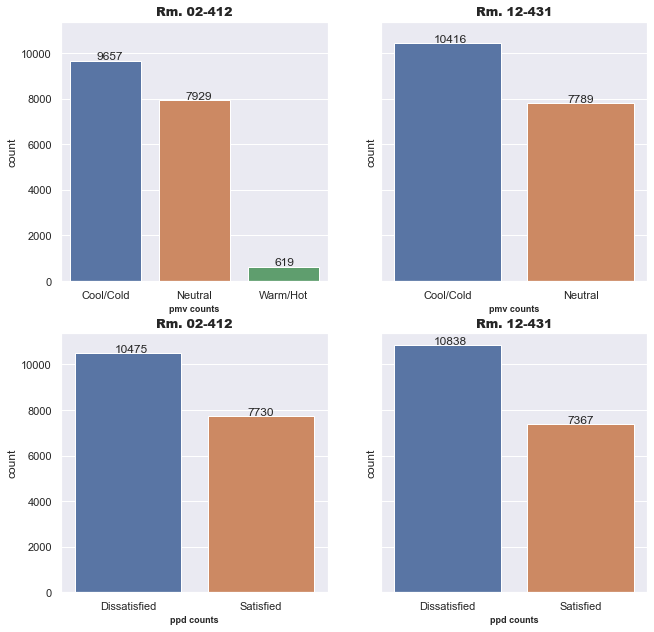

In [23]:
# 同样为「pmv」和「ppd」指数的类别绘制柱状计数图
sns.set(rc={'figure.figsize':(10.5,10.5)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)

# 绘制图表
ax1 = sns.countplot(x='pmv_cats_02_412', data=all_Temp_Huma, ax=ax1)
ax2 = sns.countplot(x='pmv_cats_12_431', data=all_Temp_Huma, ax=ax2)
ax3 = sns.countplot(x='ppd_cats_02_412', data=all_Temp_Huma, ax=ax3)
ax4 = sns.countplot(x='ppd_cats_12_431', data=all_Temp_Huma, ax=ax4)

# 编辑图表的外观
ax1.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax2.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')
ax3.set_title('Rm. 02-412', fontsize=12.5, fontweight ='heavy')
ax4.set_title('Rm. 12-431', fontsize=12.5, fontweight ='heavy')

ax1.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax2.set_xlabel('pmv counts', fontsize=9, fontweight ='bold')
ax3.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')
ax4.set_xlabel('ppd counts', fontsize=9, fontweight ='bold')

# 在柱状图上加注释
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
        
for p in ax4.patches:
        ax4.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

plt.show()

### Q5. 「pmv & ppd」指数类别的分布是什么？与温度及湿度数据类别的分布相比，可以得出什么见解？

纵使早前的柱状图显示，房间12-431中，「可接受的温度」（Acceptable temp）及「可接受的湿度」（Acceptable huma）的数据类别占多数，两个房间仍均有更多的「凉/冷」（cool/cold）时隙，亦很有可能只有不到 80% 的使用者在超过一半的时隙感到「满意」（ppd>10%）。

因此，温度及湿度都不能作为热舒适度分析的单一因素。

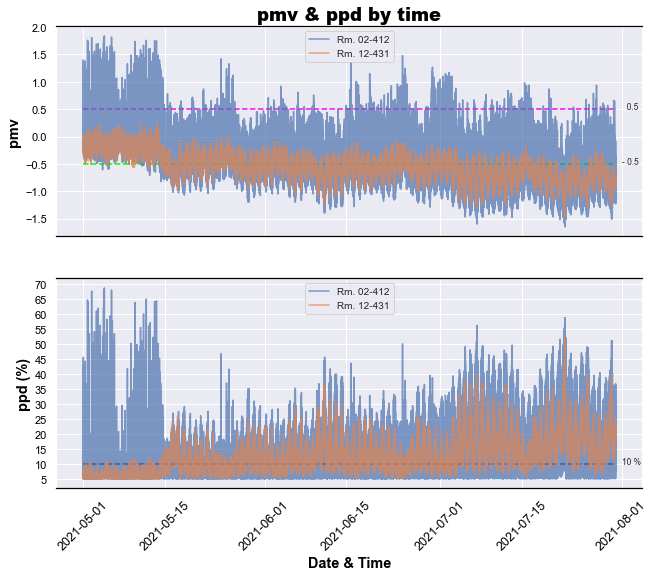

In [24]:
# 两个房间的「日期和时间」相对「pmv」和「ppd」指数的可视化，以及它们的界线
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

fig.set_size_inches(10.5, 8.5)

# 编辑图表的外观
ax1.set_title('pmv & ppd by time', color=colour_2, fontsize=18, fontweight='heavy')
ax1.spines['bottom'].set_color(colour_2)
ax1.spines['top'].set_color(colour_2)
ax1.set_ylabel('pmv', fontweight ='bold', color = colour_2, fontsize=14.5)
ax1.tick_params(colors=colour_2)
ax1.grid(True)
ax1.locator_params('y', nbins=15)

ax2.spines['bottom'].set_color(colour_2)
ax2.spines['top'].set_color(colour_2)
ax2.set_xlabel('Date & Time', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.set_ylabel('ppd (%)', fontweight ='bold', color = colour_2, fontsize=14.5)
ax2.tick_params(colors=colour_2)
ax2.grid(True)
ax2.locator_params('y', nbins=15)

plt.xticks(rotation = 45, fontsize=12.5)

# 绘制图表
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax1.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['pmv_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax1.legend(fontsize='medium', loc=9)
ax1.hlines(y=pmv_low, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='lime', linestyles='dashed')
ax1.hlines(y=pmv_neu, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='magenta', linestyles='dashed')
ax1.text('2021-08-01', pmv_low,'- 0.5', fontsize='small')
ax1.text('2021-08-01', pmv_neu,'  0.5', fontsize='small')

ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_02_412'], label = 'Rm. 02-412', alpha = 0.7)
ax2.plot(all_Temp_Huma['Date & Time'], all_Temp_Huma['ppd_12_431'], label = 'Rm. 12-431', alpha = 0.7)
ax2.legend(fontsize='medium', loc=9)
ax2.hlines(y=ppd_sat, xmin=all_Temp_Huma['Date & Time'].min(), xmax=all_Temp_Huma['Date & Time'].max(), color='darkred', linestyles='dashed')

ax2.text('2021-08-01', ppd_sat,'10 %', fontsize='small')

plt.show()

### Q6. 与两个房间的温度及湿度相比，「pmv & ppd」指数有什么趋势？

- 使用者更有可能在 2021 年 5 月上半月感受到「温暖/炎热」（秋季，pmv 大于 0.5 及 ppd 大于 10%）


- 从 2021 年 5 月中旬左右开始，pmv 指数开始逐渐下降到 - 0.5 以下，直到 7 月下旬（冬季）；同期的 ppd 指数也逐渐上升，表明室内热舒适程度更令人不满意。

# 您是否注意到「温度与日期和时间」图表看起来与「pmv 与日期和时间」图表几乎相同！ ？

虽然分别落入可接受温度及中性pmv范围内的数据集数量不尽相同，但在这种情况下，温度对pmv指数计算的影响比其他因素更大。


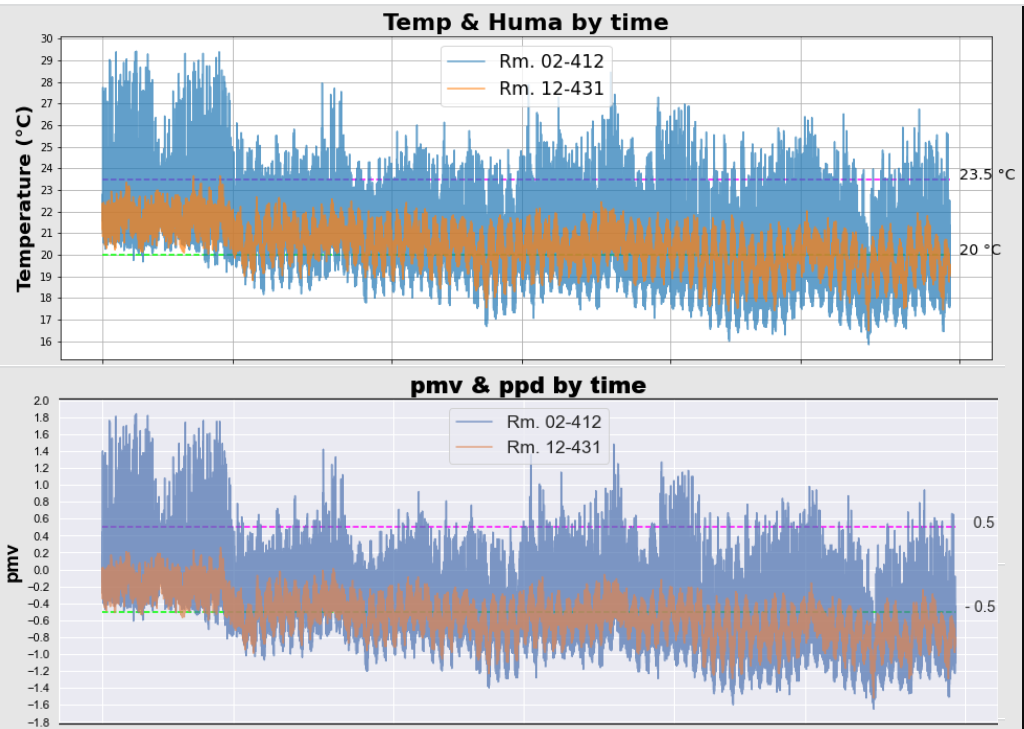

r^2 = 0.988


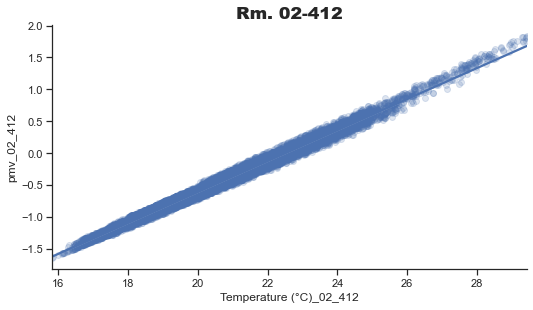

In [25]:
# 为房间02-412 的湿度与pmv指数绘制散点图（scatterplot）及回归线（regression line）
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 4.5)

x=all_Temp_Huma['Temperature (°C)_02_412']
y=all_Temp_Huma['pmv_02_412']

# 绘制图表
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'alpha':0.18})
ax.set_title('Rm. 02-412', fontsize=17.5, fontweight ='heavy')

# 计算 r^2 值
lin_reg = LinearRegression().fit(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])
r2 = lin_reg.score(all_Temp_Huma[['Temperature (°C)_02_412']], all_Temp_Huma['pmv_02_412'])

print(f'r^2 = {round(r2,3)}')
sns.despine()

plt.show()

### Q7. 房间02-412的温度数据及pmv指数之间是否存在任何关系？

温度与pmv指数的线性回归图及 r^2 值大于 0.7 均表示两组数据集之间有强相关性。

## 6. 在房间02-412最初给人「暖/热」（Warm/Hot）感觉的时隙中，采用新的衣服热阻（clo）值

从分类为「暖/热」pmv类别的时隙中，整理出其中拥有500个最低 pmv的时隙（即最接近「中性」pmv范围）。

假设大多数使用者只是选择在感到「暖/热」的时候脱下冬衣，使用相当于「裤子和长袖衬衫」的新衣服热阻（clo）值：0.61 clo 重新计算「pmv & ppd」指数，再重新检查不再给使用者带来「暖/热」和「不满意」感觉的时隙比例。

In [26]:
# 整理出「暖/热」的时隙（pmv > 0.5）
high_pmv_02_412 = all_Temp_Huma.loc[all_Temp_Huma['pmv_02_412']>pmv_neu]

num_sort=500

cols_02_412 = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 
               'Huma_cats_02_412', 'pmv_02_412', 'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412']

# 再对 500 个 pmv 值最低的时间段进行排序，并重置数据帧索引
high_ppd_02_412_500th = high_pmv_02_412[cols_02_412].nsmallest(num_sort,'pmv_02_412').sort_values(by='Date & Time')
high_ppd_02_412_500th.reset_index(drop=True, inplace=True)

print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.head()

(500, 9)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied


In [27]:
# 再三确认它们是「暖/热」的时隙，若正确结果将为空
display(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']!='Warm/Hot'])
display(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']!='Dissatisfied'])
print(high_ppd_02_412_500th[['pmv_02_412', 'ppd_02_412']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412


       pmv_02_412  ppd_02_412
count  500.000000  500.000000
mean     0.709400   16.249200
std      0.176859    5.994304
min      0.510000   10.400000
25%      0.570000   11.875000
50%      0.650000   13.800000
75%      0.810000   18.850000
max      1.160000   33.400000


In [28]:
# 应用新的衣服热阻（clo）值，看看使用者是否可以通过脱掉「典型的冬季室内服装」而获得可接受的「pmv」和「ppd」指数
clo_new = 0.61 # 「裤子和长袖衬衫」

high_ppd_02_412_500th['pmv & ppd_02_412_new'] = high_ppd_02_412_500th.apply(lambda x: pmv_ppd(x['Temperature (°C)_02_412'], 
                                                                                              x['Temperature (°C)_02_412'], 
                                                                                              air_spd_r, x['Humidity (%)_02_412'], 
                                                                                              met, clo_new, wme, standard), axis=1)

high_ppd_02_412_500th = pd.concat([high_ppd_02_412_500th.drop(['pmv & ppd_02_412_new'], axis=1), 
                                   high_ppd_02_412_500th['pmv & ppd_02_412_new'].apply(pd.Series)], axis=1)

new_cols_hot_02_412_new_clo = ['Date & Time', 'Temperature (°C)_02_412', 'Humidity (%)_02_412', 'Temp_cats_02_412', 'Huma_cats_02_412', 'pmv_02_412', 
                               'ppd_02_412', 'pmv_cats_02_412', 'ppd_cats_02_412', 'pmv_02_412_new_clo', 'ppd_02_412_new_clo']

high_ppd_02_412_500th.columns = new_cols_hot_02_412_new_clo

In [29]:
# 检查带有新的「pmv」和「ppd」列的数据帧的形状和外观
print(high_ppd_02_412_500th.shape)
high_ppd_02_412_500th.sample(5)

(500, 11)


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
264,2021-06-02 14:21:35,25.35,37.84,High Temp,Acceptable Huma,0.62,13.2,Warm/Hot,Dissatisfied,0.09,5.2
362,2021-06-29 13:16:26,25.55,54.75,High Temp,Acceptable Huma,0.81,18.7,Warm/Hot,Dissatisfied,0.29,6.7
491,2021-07-28 20:02:15,25.19,39.35,High Temp,Acceptable Huma,0.60,12.5,Warm/Hot,Dissatisfied,0.06,5.1
133,2021-05-10 04:00:44,25.19,52.69,High Temp,Acceptable Huma,0.70,15.3,Warm/Hot,Dissatisfied,0.16,5.5
180,2021-05-13 11:03:14,24.52,52.79,High Temp,Acceptable Huma,0.54,11.0,Warm/Hot,Dissatisfied,-0.04,5.0


In [29]:
# 检查其中不再给使用者带来「暖/热」和「不满意」感觉的时隙数量
improved_pmv_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_02_412_new_clo']<=pmv_neu]
improved_ppd_02_412 = high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_02_412_new_clo']<=ppd_sat]
display(improved_pmv_02_412, improved_ppd_02_412)
print(high_ppd_02_412_500th[['pmv_02_412_new_clo', 'ppd_02_412_new_clo']].describe())

,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


,Date & Time,Temperature (°C)_02_412,Humidity (%)_02_412,Temp_cats_02_412,Huma_cats_02_412,pmv_02_412,ppd_02_412,pmv_cats_02_412,ppd_cats_02_412,pmv_02_412_new_clo,ppd_02_412_new_clo
0,2021-05-01 01:15:50,24.55,59.49,High Temp,Acceptable Huma,0.59,12.4,Warm/Hot,Dissatisfied,0.01,5.0
1,2021-05-01 03:23:02,24.81,59.02,High Temp,Acceptable Huma,0.65,14.0,Warm/Hot,Dissatisfied,0.09,5.2
2,2021-05-01 09:51:51,25.32,58.32,High Temp,Acceptable Huma,0.78,17.7,Warm/Hot,Dissatisfied,0.25,6.2
3,2021-05-01 11:30:49,24.48,59.05,High Temp,Acceptable Huma,0.57,11.9,Warm/Hot,Dissatisfied,-0.01,5.0
4,2021-05-01 11:52:02,24.84,59.07,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.10,5.2
...,...,...,...,...,...,...,...,...,...,...,...
495,2021-07-29 13:00:23,25.29,26.24,High Temp,Dry,0.52,10.7,Warm/Hot,Dissatisfied,-0.01,5.0
496,2021-07-29 14:53:26,25.55,24.18,High Temp,Dry,0.57,11.7,Warm/Hot,Dissatisfied,0.05,5.0
497,2021-07-30 15:38:08,25.65,33.23,High Temp,Acceptable Huma,0.66,14.2,Warm/Hot,Dissatisfied,0.15,5.5
498,2021-07-30 17:17:07,25.39,36.73,High Temp,Acceptable Huma,0.63,13.2,Warm/Hot,Dissatisfied,0.10,5.2


       pmv_02_412_new_clo  ppd_02_412_new_clo
count          500.000000          500.000000
mean             0.175980            6.639200
std              0.218039            2.768558
min             -0.100000            5.000000
25%              0.010000            5.000000
50%              0.100000            5.200000
75%              0.312500            7.025000
max              0.740000           16.500000


In [30]:
# 计算采用新 clo 值运算后，pmv 和 ppd 指数的改进 %
improved_pmv_02_412_percentage = len(improved_pmv_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['pmv_cats_02_412']=='Warm/Hot']) * 100
improved_ppd_02_412_percentage = len(improved_ppd_02_412) / len(high_ppd_02_412_500th[high_ppd_02_412_500th['ppd_cats_02_412']=='Dissatisfied']) * 100
print('With new clo value,')
print(f'pmv in Rm.02.412 improved by {improved_pmv_02_412_percentage} %')
print(f'ppd in Rm.02.412 improved by {improved_ppd_02_412_percentage} %')

With new clo value,
pmv in Rm.02.412 improved by 88.6 %
ppd in Rm.02.412 improved by 87.8 %


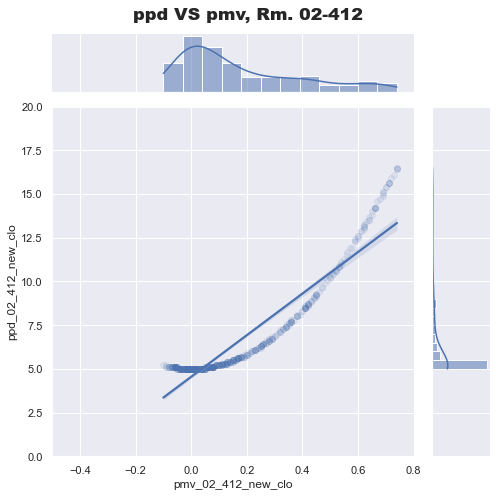

In [31]:
# 检查新的 pmv 及 ppd 指数之间的关系
sns.set_style('darkgrid')
pnp = sns.jointplot(x='pmv_02_412_new_clo', y='ppd_02_412_new_clo', data=high_ppd_02_412_500th, kind='reg', 
              height=7, xlim=[-0.5,0.8], ylim=[0,20], palette='BrBG_r', scatter_kws={'alpha':0.09})
pnp.fig.suptitle('ppd VS pmv, Rm. 02-412', fontsize=17.5, fontweight ='heavy')
pnp.fig.tight_layout()

### Q8. 针对房间02-412中，最初会产生「温暖/热」感觉的500个时段，如果使用者只是选择脱下冬季衣服，即将clo值改为0.61 clo（相当于「裤子和长袖衬衫」），他们的感觉会改善吗？如有，改善的时间段的比例会是多少？

从新计算的pmv 和 ppd指数，以及上面的关系图(jointplot)可以看出：

- 超过 87% 的时隙不会再给使用者带来「暖/热」的感觉，假设他们仅仅选择在相同的室内环境条件下脱掉衣服。


- 除了在上面的关系图中 pmv 约 -0.1 到 0.3 及 ppd 约 5.0 到 6.3 的范围内有高密度的数据点外，pmv 及 ppd 指数之间亦形成了很强的非线性相关性。

## 7. 结论及进一步建议


- 比起单纯的用温度及湿度数据作评估，「pmv & ppd」指数更为全面地考虑了多种室内环境因素


- 在一些空调较差的室内环境中，大部分使用者可以通过改变衣服热阻来改善热舒适感觉


- 尽管在复杂的计算过程及应用上取决于多个参数，但由于假设了空气速度较低、环境空气与室内物件表面之间的热传递低，在室内环境分析中，热舒适指数可能受温度的影响较高

### 进一步建议

- 除了空调系统，房间的楼层高度可能是室内环境中温度波动性的关键因素之一（须进一步分析）


- 对于能量转换，将需进一步分析以预测不同季节在不同的室内环境下空调系统的最佳选择，并平衡与传统能源的混合使用


当能源/自然资源消耗保持在最低限度时，必须分析和优化室内环境因素、通风等，对室内环境因素进行分析和优化，以有利于使用者的体验，从而体现历史数据的真实价值，如本项目中使用的数据。
当能源/自然资源消耗保持在最低水准时，必须分析和优化室内环境因素，以利于居住者的体验，并结合其他方法，如植树、建筑材料和制造业改造，通过全球合作实现碳中和目标。